In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


In [103]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [104]:
import numpy as np
import pandas as pd 
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [105]:
train_data=pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_train.csv')
test_data=pd.read_csv('/kaggle/input/sign-language-mnist/sign_mnist_test.csv')

In [106]:

# Preprocess the training data
train_data = train_df.values[:, 1:]
train_labels = train_df.values[:, 0]

# Preprocess the testing data
test_data = test_df.values[:, 1:]
test_labels = test_df.values[:, 0]

# Reshape the data
train_data = train_data.reshape(-1, 28, 28, 1)
test_data = test_data.reshape(-1, 28, 28, 1)

# Normalize the pixel values to be between 0 and 1
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the shape of the training and the testing data
print("Training data shape:", train_data.shape)
print("Training labels shape:", train_labels.shape)
print("Testing data shape:", test_data.shape)
print("Testing labels shape:", test_labels.shape)

Training data shape: (27455, 28, 28, 1)
Training labels shape: (27455,)
Testing data shape: (7172, 28, 28, 1)
Testing labels shape: (7172,)


In [107]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

test_datat=test_data/255

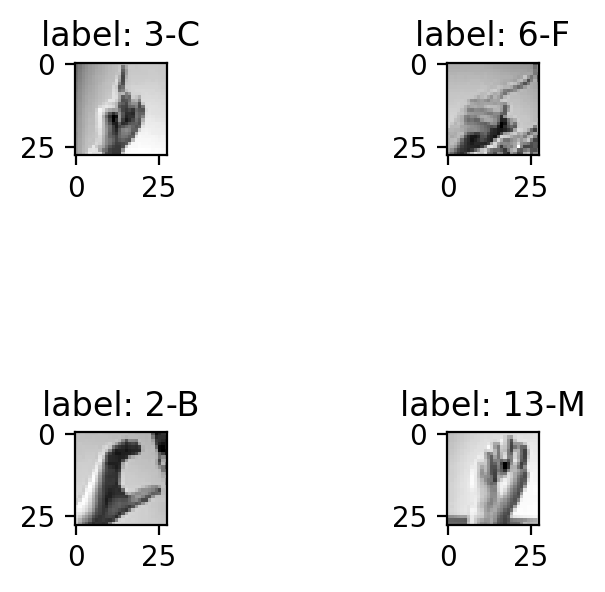

In [108]:
import matplotlib.pyplot as plt

fig, axe = plt.subplots(2, 2, figsize=(3, 3))



# Adjust the spacing between subplots
plt.subplots_adjust(hspace=3, wspace=3)

axe[0, 0].imshow(train_data[0].reshape(28, 28), cmap='gray')


axe[0, 0].set_title('label: 3-C')



axe[0, 1].imshow(train_data[1].reshape(28, 28), cmap='gray')


axe[0, 1].set_title('label: 6-F')



axe[1, 0].imshow(train_data[2].reshape(28, 28), cmap='gray')


axe[1, 0].set_title('label: 2-B')



axe[1, 1].imshow(train_data[4].reshape(28, 28), cmap='gray')


axe[1, 1].set_title('label: 13-M')


plt.show()



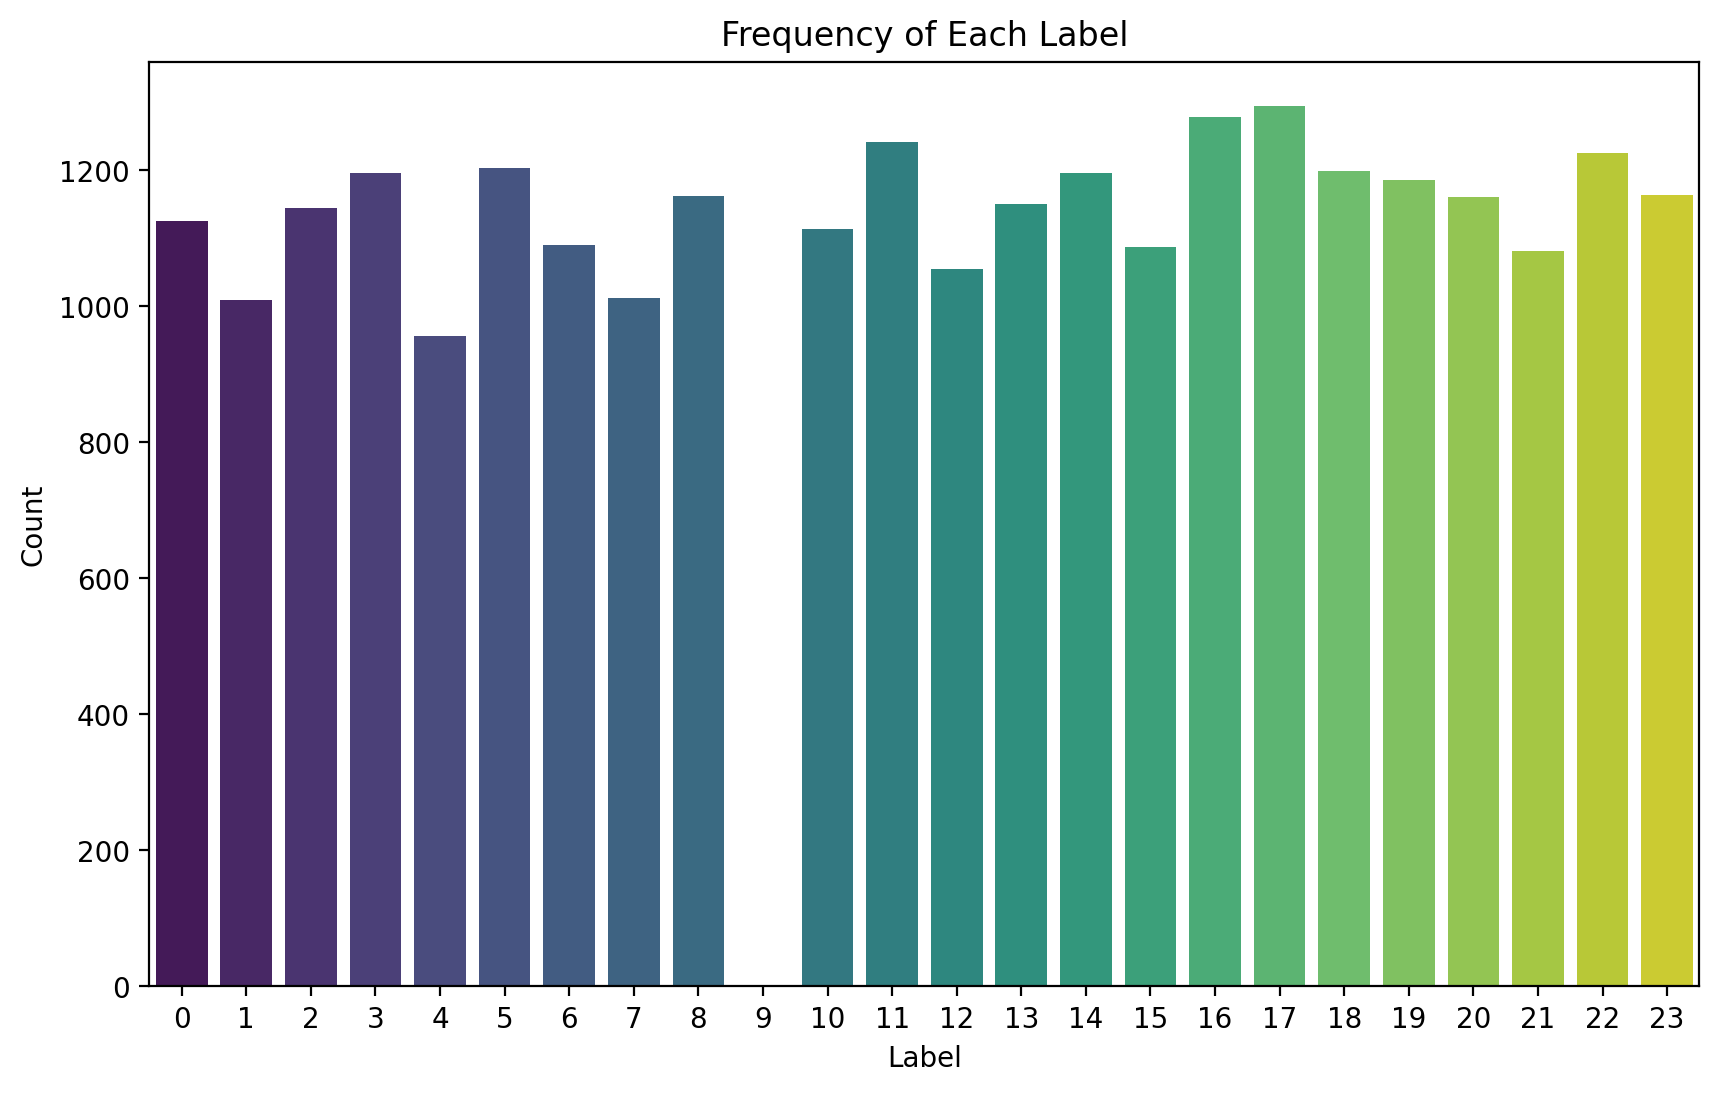

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create an array to store the count of each label
label_counts = []

# Count the occurrences of each label from 0 to 23
for label in range(24):
    count = np.count_nonzero(train_labels == label)
    label_counts.append(count)

# Plot the count of each label
plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(24), y=label_counts, palette="viridis")
plt.title("Frequency of Each Label")
plt.xlabel("Label")
plt.ylabel("Count")
plt.xticks(np.arange(24))
plt.show()


In [113]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
          
model.add(Flatten())

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [114]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 28, 28, 128)    │         3,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 14, 14, 64)     │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 7, 7, 32)       │         8,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 24)             │        12,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 319,352 (1.22 MB)

 Trainable params: 319,352 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [115]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [116]:
# One-hot encode the training and testing labels
train_labels = pd.get_dummies(train_labels).values
test_labels = pd.get_dummies(test_labels).values

# Train the model
model.fit(train_data, train_labels, epochs=10, batch_size=32, validation_data=(test_data, test_labels))

Epoch 1/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 62s 69ms/step - accuracy: 0.4435 - loss: 1.8182 - val_accuracy: 0.8615 - val_loss: 0.4305
Epoch 2/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 78s 65ms/step - accuracy: 0.9834 - loss: 0.0552 - val_accuracy: 0.9122 - val_loss: 0.4355
Epoch 3/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 82s 65ms/step - accuracy: 0.9912 - loss: 0.0280 - val_accuracy: 0.9311 - val_loss: 0.3314
Epoch 4/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 82s 65ms/step - accuracy: 0.9946 - loss: 0.0183 - val_accuracy: 0.9105 - val_loss: 0.3958
Epoch 5/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 56s 65ms/step - accuracy: 0.9938 - loss: 0.0233 - val_accuracy: 0.9477 - val_loss: 0.2836
Epoch 6/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 81s 64ms/step - accuracy: 0.9949 - loss: 0.0161 - val_accuracy: 0.9384 - val_loss: 0.2695
Epoch 7/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 84s 67ms/step - accuracy: 0.9995 - loss: 0.0015 - val_accuracy: 0.9241 - val_loss: 0.4886
Epoch 8/10
858/858 ━━━━━━━━━━━━━━━━━━━━ 55s 64ms/step - accuracy: 0.9898 - loss: 0.0351 - 

In [118]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(test_data, test_labels)

# Print the test loss and accuracy
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9311 - loss: 0.4450
Test Loss: 0.4062
Test Accuracy: 0.9334


In [120]:
print('MODEL ACCURACY = {}%'.format(accuracy*100))

MODEL ACCURACY = 93.33519339561462%
